
Primeiras linhas do conjunto de dados:
    survived  pclass  sex   age  sibsp  parch  embarked   class  adult_male  \
0          0       3    1  22.0      1      0         2   Third        True   
1          1       1    0  38.0      1      0         0   First       False   
2          1       3    0  26.0      0      0         2   Third       False   
3          1       1    0  35.0      1      0         2   First       False   
4          0       3    1  35.0      0      0         2   Third        True   
5          0       3    1  28.0      0      0         1   Third        True   
6          0       1    1  54.0      0      0         2   First        True   
7          0       3    1   2.0      3      1         2   Third       False   
8          1       3    0  27.0      0      2         2   Third       False   
9          1       2    0  14.0      1      0         0  Second       False   
10         1       3    0   4.0      1      1         2   Third       False   
11         1

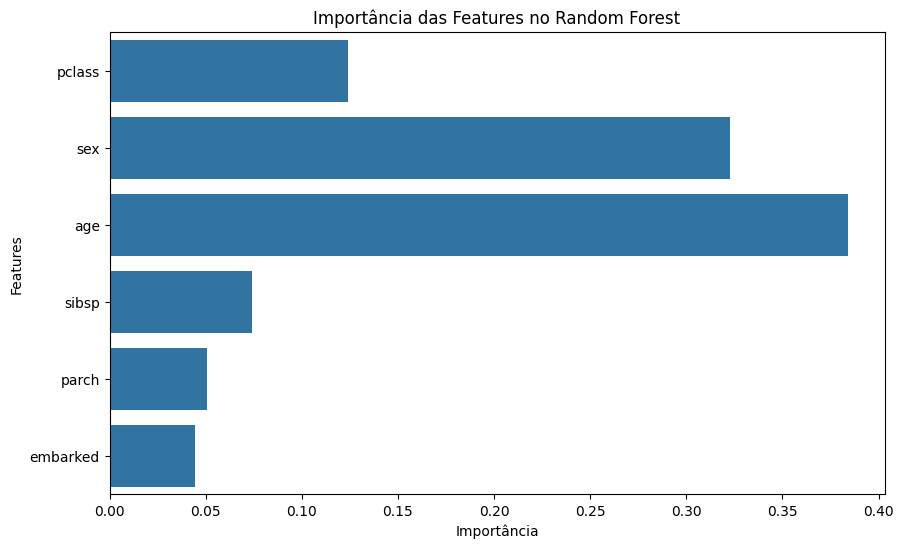

<ipython-input-16-67328b50039b>:117: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_data, ci=None)


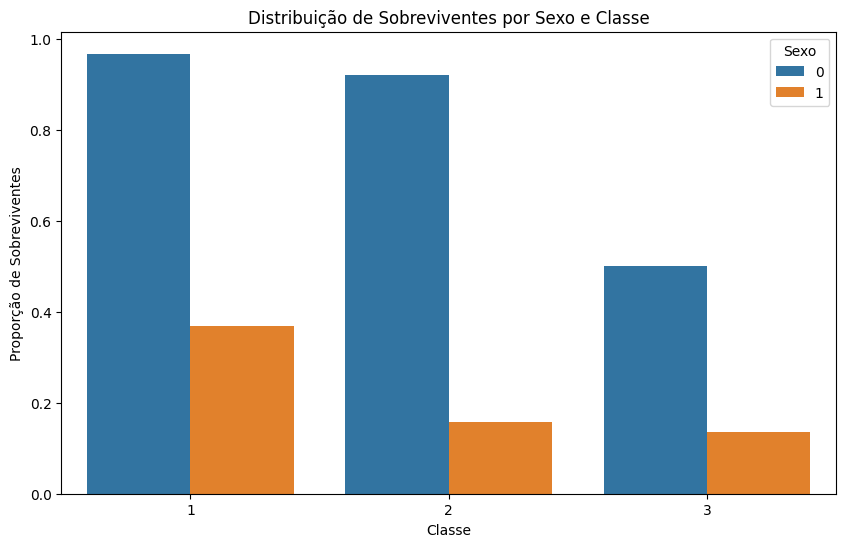

Insira os dados do passageiro:
Classe (1, 2 ou 3): 1
Sexo (0 para homem, 1 para mulher): 1
Idade: 1
Número de irmãos/cônjuges a bordo: 0
Número de pais/filhos a bordo: 1
Porto de embarque (0 para Cherbourg, 1 para Queenstown, 2 para Southampton): 1
O passageiro teria sobrevivido.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Digite seu token do GitHub: ··········
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'PrevisaoTitanic': No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
cp: cannot create regular file '/content/PrevisaoTitanic/': Not a directory
[Errno 2] No such file or directory: '/conte

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Carregar o conjunto de dados do Titanic
titanic_data = sns.load_dataset("titanic")

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Ajustar e transformar a coluna 'sex'
titanic_data['sex'] = label_encoder.fit_transform(titanic_data['sex'])

# Remover as colunas 'alive', 'fare' e 'deck'
titanic_data = titanic_data.drop(columns=['alive', 'fare', 'deck', 'who'])

# Converter a coluna 'age' para numérica, forçando valores não numéricos a serem NaN
titanic_data['age'] = pd.to_numeric(titanic_data['age'], errors='coerce')

# Calcular a mediana da coluna 'age'
median_age = titanic_data['age'].median()

# Preencher valores nulos na coluna 'age' com a mediana
titanic_data['age'] = titanic_data['age'].fillna(median_age)

# Calcular o valor mais comum (moda) da coluna 'embarked'
most_common_embarked = titanic_data['embarked'].mode()[0]

# Preencher valores nulos na coluna 'embarked' com o valor mais comum
titanic_data['embarked'] = titanic_data['embarked'].fillna(most_common_embarked)

# Converter a coluna 'embarked' em numérica usando LabelEncoder
titanic_data['embarked'] = label_encoder.fit_transform(titanic_data['embarked'])

# Definir as características (features)
features = titanic_data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# Definir a variável alvo (target)
target = titanic_data['survived']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Exibir as primeiras linhas do conjunto de dados
print("\nPrimeiras linhas do conjunto de dados:")
print(titanic_data.head(20))

# Exibir informações sobre o DataFrame
print("\nInformações sobre o conjunto de dados:")
titanic_data.info()

# Exibir estatísticas descritivas do DataFrame
print("\nEstatísticas descritivas do conjunto de dados:")
print(titanic_data.describe())

# Verificar o tamanho dos conjuntos de treinamento e teste
print(f"Tamanho do conjunto de treinamento (features): {X_train.shape}")
print(f"Tamanho do conjunto de teste (features): {X_test.shape}")
print(f"Tamanho do conjunto de treinamento (target): {y_train.shape}")
print(f"Tamanho do conjunto de teste (target): {y_test.shape}")

# Treinar o modelo de Regressão Logística
logistic_model = LogisticRegression(max_iter=200)
logistic_model.fit(X_train, y_train)

# Treinar o modelo de Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

# Fazer previsões com os modelos
logistic_predictions = logistic_model.predict(X_test)
forest_predictions = forest_model.predict(X_test)

# Avaliar a performance dos modelos
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
forest_accuracy = accuracy_score(y_test, forest_predictions)

logistic_conf_matrix = confusion_matrix(y_test, logistic_predictions)
forest_conf_matrix = confusion_matrix(y_test, forest_predictions)

logistic_report = classification_report(y_test, logistic_predictions)
forest_report = classification_report(y_test, forest_predictions)

# Exibir os resultados
print("Resultados da Regressão Logística:")
print(f"Acurácia: {logistic_accuracy:.2f}")
print("Matriz de Confusão:")
print(logistic_conf_matrix)
print("Relatório de Classificação:")
print(logistic_report)

print("\nResultados do Random Forest:")
print(f"Acurácia: {forest_accuracy:.2f}")
print("Matriz de Confusão:")
print(forest_conf_matrix)
print("Relatório de Classificação:")
print(forest_report)

# Gráfico de Importância das Features
feature_importances = forest_model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, orient='h')
plt.title('Importância das Features no Random Forest')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

# Gráfico de Distribuição de Sobreviventes por Sexo e Classe
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_data, ci=None)
plt.title('Distribuição de Sobreviventes por Sexo e Classe')
plt.xlabel('Classe')
plt.ylabel('Proporção de Sobreviventes')
plt.legend(title='Sexo', loc='upper right')
plt.show()

# Função para prever a sobrevivência de um passageiro
def prever_sobrevivencia():
    print("Insira os dados do passageiro:")
    pclass = int(input("Classe (1, 2 ou 3): "))
    sex = int(input("Sexo (0 para homem, 1 para mulher): "))
    age = float(input("Idade: "))
    sibsp = int(input("Número de irmãos/cônjuges a bordo: "))
    parch = int(input("Número de pais/filhos a bordo: "))
    embarked = int(input("Porto de embarque (0 para Cherbourg, 1 para Queenstown, 2 para Southampton): "))

    # Criar um DataFrame com os dados do passageiro
    passageiro = pd.DataFrame({
        'pclass': [pclass],
        'sex': [sex],
        'age': [age],
        'sibsp': [sibsp],
        'parch': [parch],
        'embarked': [embarked]
    })

    # Fazer a previsão
    previsao = forest_model.predict(passageiro)

    # Exibir o resultado
    if previsao[0] == 1:
        print("O passageiro teria sobrevivido.")
    else:
        print("O passageiro não teria sobrevivido.")

# Exemplo de uso da função
prever_sobrevivencia()

from google.colab import drive
from getpass import getpass
import os

# Monta o Google Drive
drive.mount('/content/drive')

# Solicita o token do GitHub sem expor ele no notebook
token = getpass('Digite seu token do GitHub: ')

# Configurações do Git
os.system('git config --global user.email "rodrigogomespaixao@bol.com.br"')
os.system('git config --global user.name "RGPaix"')

# Remove qualquer pasta antiga
!rm -rf /content/PrevisaoTitanic

# Clona o repositório (vazio) usando o token
!git clone https://{token}@github.com/RGPaix/PrevisaoTitanic.git

# Copia o notebook para o repositório
!cp "/content/drive/MyDrive/Colab Notebooks/Trabalho02.ipynb" /content/PrevisaoTitanic/

# Vai para a pasta do repositório
%cd /content/PrevisaoTitanic

# Adiciona o notebook ao controle de versão
!git add Trabalho02.ipynb

# Faz o commit
!git commit -m "Adiciona notebook Trabalho02 (sem token)"

# Força push para evitar conflito com commit anterior bloqueado
!git branch -M main
!git remote set-url origin https://{token}@github.com/RGPaix/PrevisaoTitanic.git
!git push -f origin main
